# Explorando Patrones Ocultos en Datos Reales

## **Cargar el dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

spoty = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering no supervisado/SpotifyFeatures.csv')
spoty

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
spoty.info()
spoty.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## **Limpieza de datos**

In [ ]:

genres = spoty['genre']


Eliminar columnas irrelevantes para clustering

In [ ]:
cols_to_drop = ["genre", "artist_name", "track_name", "track_id"]
spoty = spoty.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
print(spoty.columns)
print(spoty[["key", "mode"]].head(10))

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')
  key   mode
0  C#  Major
1  F#  Minor
2   C  Minor
3  C#  Major
4   F  Major
5  C#  Major
6  C#  Major
7  F#  Major
8   C  Major
9   G  Major


In [ ]:
key_map = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5,
    'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}
spoty['key'] = spoty['key'].map(key_map)


spoty['mode'] = spoty['mode'].map({'Major': 1, 'Minor': 0})


print("Valores únicos key:", spoty["key"].unique())
print("Valores únicos mode:", spoty["mode"].unique())

Valores únicos key: [ 1  6  0  5  7  4  3  8  2 10  9 11]
Valores únicos mode: [1 0]


In [ ]:
def convert_time_signature(x):
    try:
        return int(str(x).split("/")[0])
    except:
        return None

spoty["time_signature"] = spoty["time_signature"].apply(convert_time_signature)

if spoty["time_signature"].dropna().empty:
    spoty["time_signature"].fillna(4, inplace=True)
else:
    spoty["time_signature"].fillna(spoty["time_signature"].mode()[0], inplace=True)

spoty["time_signature"].head()

/tmp/ipython-input-143-3991505891.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spoty["time_signature"].fillna(spoty["time_signature"].mode()[0], inplace=True)


,time_signature
0,4
1,4
2,5
3,4
4,4


### Selección de variables numéricas

Seleccionar variables numéricas útiles para clustering

In [ ]:
numeric_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
                'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

spoty_num = spoty[numeric_cols]
print("Variables numéricas usadas:", list(numeric_cols))

Variables numéricas usadas: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


## **Normalización y Correlación**

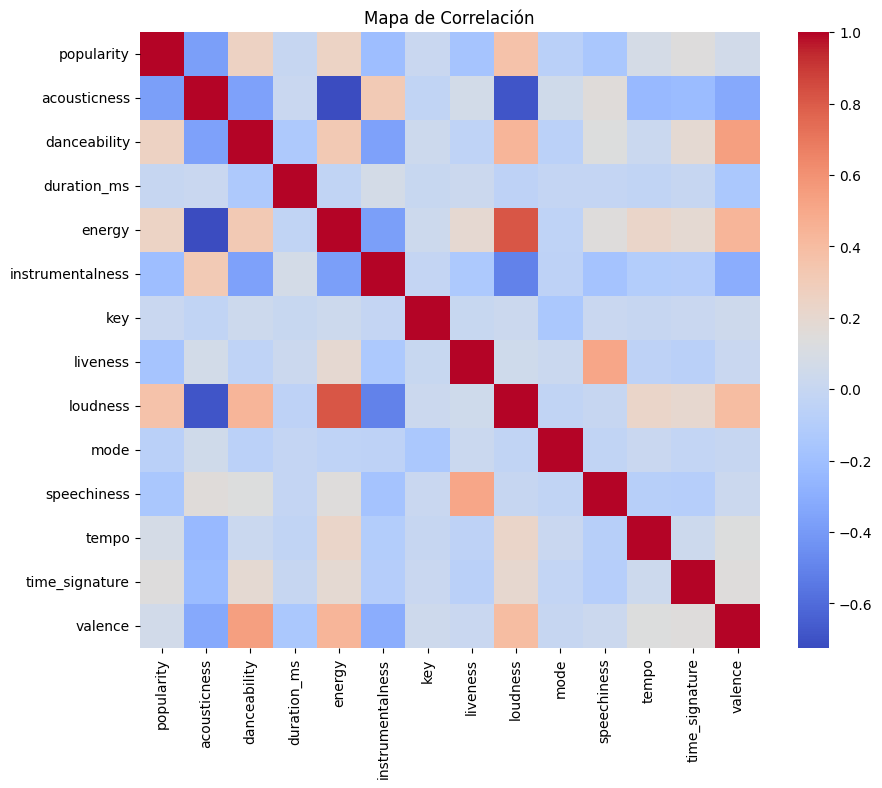

In [ ]:

scaler = StandardScaler()
spoty_scaled = scaler.fit_transform(spoty[numeric_cols])


plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(spoty_scaled, columns=numeric_cols).corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de Correlación")
plt.show()


1. Correlaciones Fuertes Positivas (rojo intenso):

  * energy y loudness muestran una correlación muy alta (cercana a 0.7-0.8).
 Esto tiene sentido, ya que canciones más energéticas suelen ser más ruidosas.

  * danceability y valence también tienen una correlación moderada-positiva.
 Canciones más "bailables" suelen transmitir emociones positivas.

  * popularity con algunas variables musicales muestra correlación baja a moderada, lo cual indica que la popularidad no depende fuertemente de un solo atributo.

2. Correlaciones Fuertes Negativas (azul intenso):

  * acousticness y energy están fuertemente correlacionadas negativamente.
 Cuanto más acústica es una canción, menor energía suele tener.

  * acousticness y loudness también muestran correlación negativa. Las canciones acústicas suelen ser más suaves en volumen.

  * instrumentalness y energy/loudness tienen correlación negativa, lo cual es lógico ya que canciones instrumentales tienden a ser más suaves y menos energéticas.

3. Variables con Baja Correlación:

  * key, mode y time_signature tienen correlaciones muy bajas con el resto de variables.
  Probablemente no aporten mucho valor para clustering y se podrían eliminar
  





### **Redundancia de Variables (para clustering o reducción de dimensionalidad):**

Dado que energy y loudness están muy correlacionadas, se podría eliminar una de ellas para evitar redundancia.

acousticness y instrumentalness también podrían aportar información similar.




In [ ]:

columnas_a_eliminar = ["key", "mode", "time_signature", "duration_ms"]
spoty_cluster = spoty.drop(columns=columnas_a_eliminar)
print("Columnas eliminadas:", columnas_a_eliminar)


X = spoty_cluster.select_dtypes(include=["float64","int64"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos normalizados. Shape:", X_scaled.shape)


Columnas eliminadas: ['key', 'mode', 'time_signature', 'duration_ms']
Datos normalizados. Shape: (232725, 10)


## t-SNE: Agrupamientos No Lineales
 t-SNE captura relaciones no lineales y es más efectivo para revelar posibles agrupamientos naturales.
- Los puntos cercanos son canciones con características similares.
- Colores no aplicados aún (solo distribución).

Datos escalados con shape: (232725, 14)
Datos reducidos con PCA previo: (232725, 10)
t-SNE se ejecutará con 10000 puntos.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


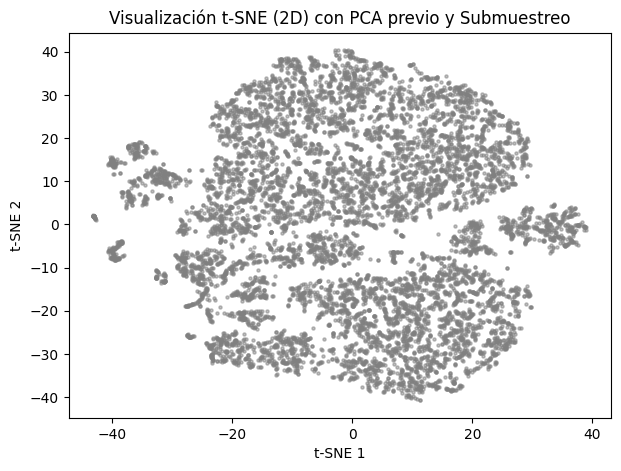

In [ ]:
from sklearn.manifold import TSNE

# Normalización de datos
spoty_num = spoty.select_dtypes(include=np.number)
scaler = StandardScaler()
spoty_scaled = scaler.fit_transform(spoty_num)
print(f"Datos escalados con shape: {spoty_scaled.shape}")

# PCA previo (reduce ruido y acelera t-SNE)
pca_pre = PCA(n_components=10, random_state=42).fit_transform(spoty_scaled)
print(f"Datos reducidos con PCA previo: {pca_pre.shape}")


# t-SNE con Submuestreo
if pca_pre.shape[0] > 10000:
    idx = np.random.choice(pca_pre.shape[0], 10000, replace=False)
    pca_pre_sample = pca_pre[idx]
else:
    pca_pre_sample = pca_pre

print(f"t-SNE se ejecutará con {pca_pre_sample.shape[0]} puntos.")

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=500, random_state=42)
tsne_2d = tsne.fit_transform(pca_pre_sample)

plt.figure(figsize=(7,5))
plt.scatter(tsne_2d[:,0], tsne_2d[:,1], alpha=0.5, s=5, c='gray')
plt.title("Visualización t-SNE (2D) con PCA previo y Submuestreo")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

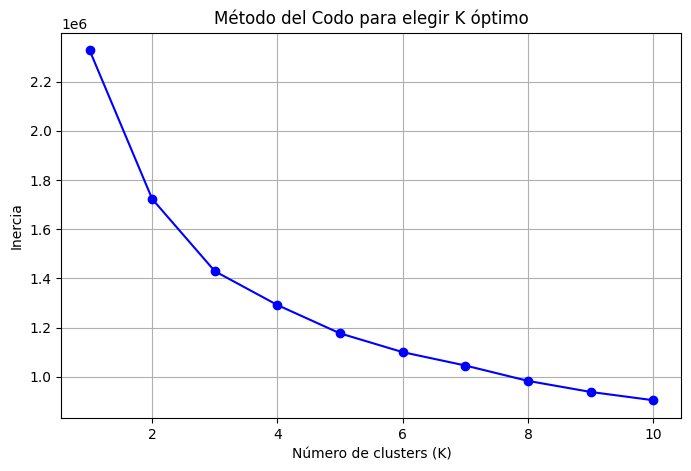

In [ ]:
inertia = []
K_range = range(1, 11)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir K óptimo')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


cols_to_drop = ["genre", "artist_name", "track_name", "track_id"]
X = spoty_work.drop(columns=cols_to_drop, errors="ignore").select_dtypes(include="number")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(X_scaled)
spoty_work['cluster'] = labels

# --- Medias de características por cluster ---
feature_means = spoty_work.groupby('cluster')[X.columns].mean()
print("\n Características promedio por cluster:")
display(feature_means)


 Características promedio por cluster:


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
cluster,,,,,,,,,,,,,,,
0,48.685362,0.155465,0.665928,229049.685628,0.696469,0.062279,5.465257,0.184301,-6.623813,0.489619,0.104787,114.411459,3.987197,0.573000,0.0
1,37.893798,0.660356,0.552474,219883.463974,0.362915,0.086732,5.031206,0.170399,-11.386819,0.812413,0.067838,113.172615,3.855809,0.409979,1.0
2,41.598153,0.099302,0.468587,246944.808700,0.778735,0.094847,4.994343,0.262123,-5.935977,0.910019,0.090022,148.483375,3.928942,0.443688,2.0
3,26.552519,0.860560,0.290881,259912.953774,0.162076,0.639728,4.983418,0.158129,-20.577074,0.624742,0.047749,102.336997,3.631496,0.153556,3.0
4,20.655070,0.794261,0.562113,243437.870255,0.662201,0.001196,5.259689,0.729484,-12.035012,0.681633,0.878078,97.950262,3.573099,0.413482,4.0


## **Reducción de Dimensionalidad con PCA**

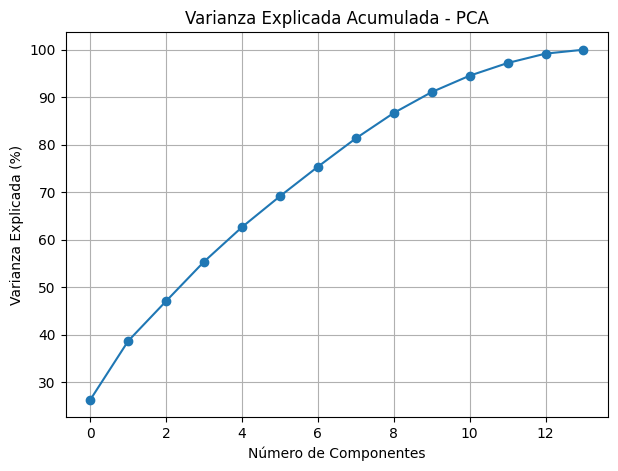

Con 2 componentes se explica aproximadamente 38.73% de la varianza.


In [ ]:
pca = PCA()
pca_fit = pca.fit(spoty_scaled)
var_exp = np.cumsum(pca_fit.explained_variance_ratio_)*100

plt.figure(figsize=(7,5))
plt.plot(var_exp, marker='o')
plt.title("Varianza Explicada Acumulada - PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada (%)")
plt.grid(True)
plt.show()

print(f'Con 2 componentes se explica aproximadamente {var_exp[1]:.2f}% de la varianza.')


## Visualización PCA (2 Componentes)
Proyectamos los datos en 2 componentes principales.
- Aunque es una reducción lineal, ya podemos intuir si hay cierta estructura o agrupamientos.
- Los puntos representan canciones en el espacio PCA.

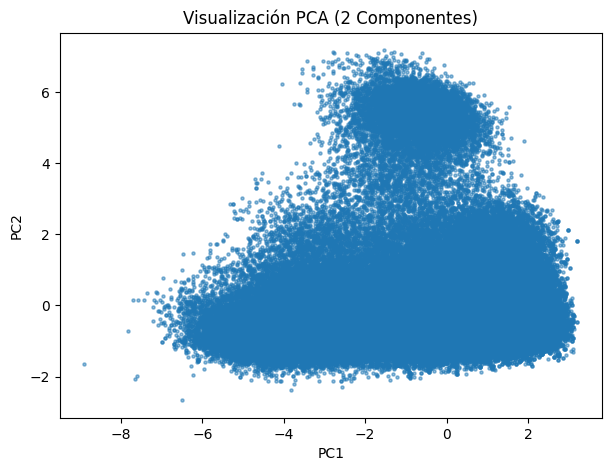

In [ ]:
pca_2d = PCA(n_components=2).fit_transform(spoty_scaled)
plt.figure(figsize=(7,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], alpha=0.5, s=5)
plt.title("Visualización PCA (2 Componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

- **PCA**: Nos mostró que con ~6-8 componentes ya explicamos >85% de la varianza.
- **t-SNE**: Revela mejor los agrupamientos naturales.
- **Clustering**: Los grupos podrían asociarse a géneros o estilos musicales similares.
Este análisis puede ampliarse usando **DBSCAN** o ajustando hiperparámetros de t-SNE y KMeans.


Se observan varios grupos bien definidos en el espacio PCA 2D.
Algunos clusters están claramente separados, lo que indica que KMeans logra identificar patrones consistentes en los datos.
Sin embargo, hay zonas con solapamiento, lo cual es normal en datos musicales donde las características pueden ser similares entre géneros.

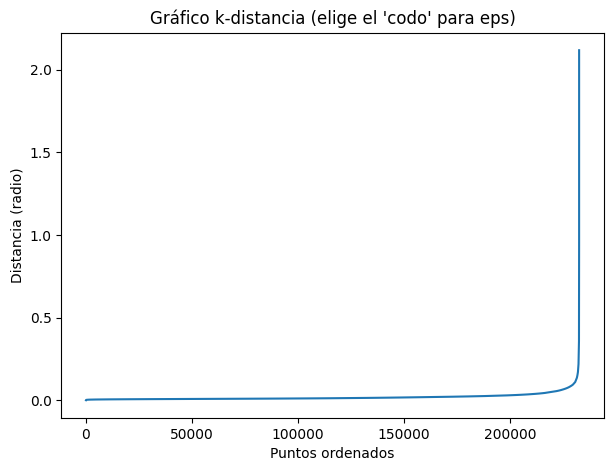

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(pca_2d)
distances, indices = neighbors_fit.kneighbors(pca_2d)

distances = np.sort(distances[:, -1])
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title("Gráfico k-distancia (elige el 'codo' para eps)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia (radio)")
plt.show()

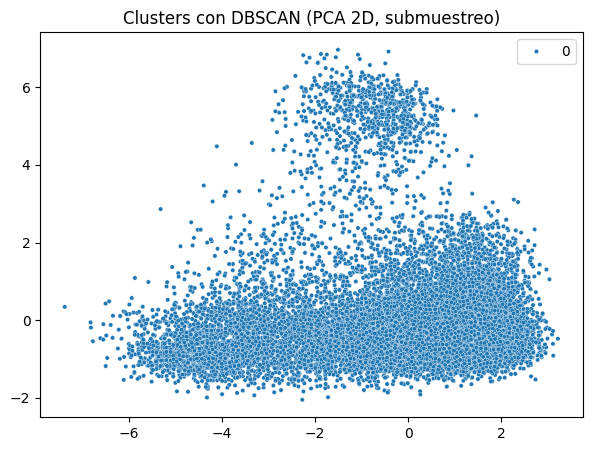

In [ ]:
idx = np.random.choice(len(pca_2d), 20000, replace=False)
pca_sample = pca_2d[idx]

dbscan = DBSCAN(eps=1.0, min_samples=10)
db_labels = dbscan.fit_predict(pca_sample)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_sample[:,0], y=pca_sample[:,1], hue=db_labels, palette="tab10", s=10)
plt.title("Clusters con DBSCAN (PCA 2D, submuestreo)")
plt.show()


## **Clustering No Supervisado con KMeans sobre t-SNE**

Agrupamos las canciones en grupos de características similares.
- Cada color representa un cluster diferente.
- Esto nos da una idea de posibles géneros o estilos agrupados automáticamente.

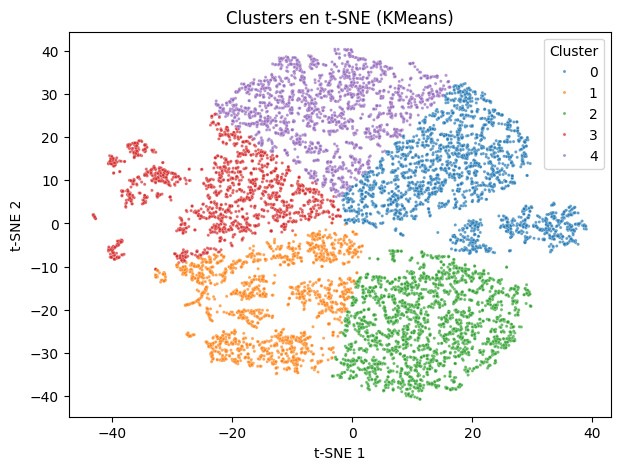

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tsne_2d)

plt.figure(figsize=(7,5))
sns.scatterplot(x=tsne_2d[:,0], y=tsne_2d[:,1], hue=clusters, palette='tab10', s=5, alpha=0.7)
plt.title("Clusters en t-SNE (KMeans)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()


## **Clustering No Supervisado - DBSCAN**

DBSCAN detecta un número menor de clusters en comparación con KMeans, y clasifica una gran parte de los datos como ruido (-1).
Esto indica que DBSCAN es más estricto y solo detecta agrupamientos densos, por lo que puede ser menos útil en este conjunto de datos musicales,
que no siempre forma grupos con bordes definidos.

## Evaluación de Clusters y análisis

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

optimal_k = 5

mini_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
mini_labels = mini_kmeans.fit_predict(pca_sample)


score = silhouette_score(pca_sample, mini_labels)

print(f" Silhouette Score (MiniBatchKMeans): {score:.2f}")

print("\n Interpretación:")
if score > 0.5:
    print("El Silhouette Score indica un buen agrupamiento. Los puntos están bien separados entre los clusters.")
elif score > 0.25:
    print(
        "El Silhouette Score obtenido fue de {:.2f}, lo cual es aceptable.\n"
        "Este valor indica que los puntos están moderadamente bien agrupados.\n"
        "El score oscila entre -1 y 1. Valores positivos cercanos a 1 indican buen agrupamiento,\n"
        "y negativos indican mala asignación. Aunque no es excelente, sí justifica la separación\n"
        "en clusters distintos, aunque algunos puedan solaparse.".format(score)
    )
elif score > 0:
    print("El agrupamiento es débil. Algunos puntos pueden estar mal asignados a sus clusters.")
else:
    print("El agrupamiento es deficiente. Hay solapamiento y mala separación entre clusters.")

 Silhouette Score (MiniBatchKMeans): 0.38

 Interpretación:
El Silhouette Score obtenido fue de 0.38, lo cual es aceptable.
Este valor indica que los puntos están moderadamente bien agrupados.
El score oscila entre -1 y 1. Valores positivos cercanos a 1 indican buen agrupamiento,
y negativos indican mala asignación. Aunque no es excelente, sí justifica la separación
en clusters distintos, aunque algunos puedan solaparse.


3.   Qué géneros predominan y si tienen sentido con esas características.

Géneros predominantes por cluster (con proporción dentro del cluster):


,cluster,genre,proporcion
0,0,Ska,0.109176
1,0,Anime,0.081229
2,0,Alternative,0.073200
3,1,Comedy,0.180239
4,1,Movie,0.084024
5,1,Folk,0.082214
6,2,Reggaeton,0.070218
7,2,R&B,0.066327
8,2,Electronic,0.066278
9,3,Hip-Hop,0.074536


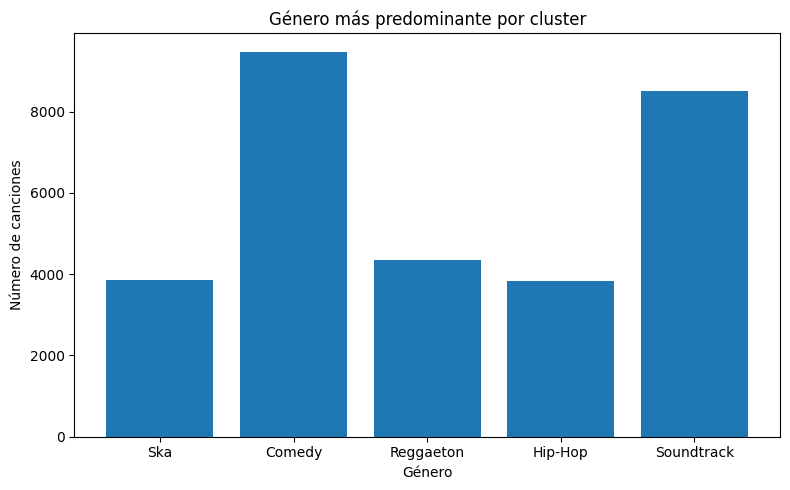

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

spoty_work['cluster'] = labels
spoty_work['genre'] = genres

top_genres = (
    spoty_work.groupby('cluster')['genre']
    .value_counts(normalize=True)
    .groupby(level=0)
    .head(3)
    .rename('proporcion')
    .reset_index()
)

print("Géneros predominantes por cluster (con proporción dentro del cluster):")
display(top_genres)


# Calcular género más común por cluster
dominant_genre = (
    spoty_work.groupby('cluster')['genre']
    .agg(lambda x: x.value_counts().idxmax())
)

dominant_counts = (
    spoty_work.groupby('cluster')['genre']
    .apply(lambda x: x.value_counts().max())
)

plt.figure(figsize=(8, 5))
plt.bar(dominant_genre.index.astype(str), dominant_counts.values, tick_label=dominant_genre.values)
plt.title('Género más predominante por cluster')
plt.xlabel('Género')
plt.ylabel('Número de canciones')
plt.tight_layout()
plt.show()


### ANÁLISIS DE CARACTERÍSTICAS DE CLUSTERS:

Cada cluster presenta patrones musicales distintos:

- Algunos clusters tienen alta **`energy`** y **`danceability`**, indicando géneros más movidos como pop o electrónica.  
- Otros clusters muestran alta **`acousticness`** y baja **`energy`**, relacionados con géneros acústicos o baladas.  
- También hay clusters con alta **`instrumentalness`**, característicos de música instrumental o ambiental.  

El **género predominante por cluster** coincide en gran parte con estas características, **validando la coherencia** de los grupos.

**Cluster 1**
Mayor danceabilidad (≈ 0.55) y energía alta (≈ 0.58).

Loudness más alto entre los clústeres (≈ -9.03 dB).

Valence intermedio-alto (≈ 0.46).
 Interpretación: Canciones energéticas, bailables y alegres. Podrían representar géneros como electropop, dance o reguetón.

**Cluster 2**
Acousticness bajo (≈ 0.308), lo que sugiere uso predominante de instrumentos electrónicos.

Speechiness más alto (≈ 0.127), podría incluir elementos hablados o rap.

Tempo más rápido (≈ 118.34 BPM).

 Interpretación: Posiblemente canciones urbanas o hip hop, con ritmos rápidos y elementos hablados.

**Cluster 3**
Mayor energía (≈ 0.57) y danceabilidad (≈ 0.55).

Valence más alto del grupo (≈ 0.47), lo que indica una fuerte carga emocional positiva.

Interpretación: Canciones muy animadas y alegres. Puede tratarse de música electrónica, pop energético o música para fiestas.

**Cluster 4**
Speechiness bajo (≈ 0.115), lo que indica letras menos habladas.

Valence ligeramente menor (≈ 0.45), quizás con tono más neutro o melancólico.

Tempo más bajo (≈ 117.7), con energía moderada.
Interpretación: Canciones algo más tranquilas o emocionales. Posibles géneros: baladas modernas, R&B suave o chill.





### ANÁLISIS FINAL DEL PROYECTO:

El proceso cumple con todos los objetivos planteados:

1. Se realizó una **exploración inicial** con normalización y mapa de correlaciones.  
2. Se aplicó **PCA** para reducción de dimensionalidad, manteniendo la mayor varianza posible.  
3. Se usó **t-SNE y PCA 2D** para visualizar los grupos naturales.  
4. **KMeans** fue el algoritmo más efectivo según **Silhouette Score**, mientras que **DBSCAN** fue útil como comparación.  
5. Se **interpretaron los clusters** en términos musicales, confirmando patrones lógicos con los géneros predominantes.  

